# FRMP Project

Words, words, words.

In [38]:
%matplotlib inline

In [50]:
from collections import Counter

In [2]:
# Import local function for importing data
from load import load_subjects

## Settings

In [3]:
# Set data path
data_path = '/Users/exp/Desktop/MilanData/FR1'

In [4]:
# Define list of subjects
subjs = ['R1556J','R1555J','R1510Z','R1559Z','R1554J','R1558Z','R1511Z','R1557J','R1553J']

# Define list of sessions
sessions = [0, 1]

## Data Loading

In [5]:
# Load data
df = load_subjects(subjs, sessions, data_path)
print('Data loaded!')

Data loaded!


## Check Dataframe

In [6]:
# Check out the dataframe - print first 5 rows with 'head'
df.head(5)

,condition,exp_group,intrus_per_trial,item_name,recalled,recorder,serialpos,session,subject,trial,type
0,FR,Young adults,0,BEAK,1,1,1,0,R1556J,1,WORD
1,FR,Young adults,0,SNACK,1,2,2,0,R1556J,1,WORD
2,FR,Young adults,0,EEL,1,3,3,0,R1556J,1,WORD
3,FR,Young adults,0,LEAF,1,4,4,0,R1556J,1,WORD
4,FR,Young adults,0,BEEF,1,5,5,0,R1556J,1,WORD


In [7]:
# Check out the dataframe - print last 5 rows with 'tail'
df.tail(5)

,condition,exp_group,intrus_per_trial,item_name,recalled,recorder,serialpos,session,subject,trial,type
2455,FR_MP,Young adults,1,ARK,0,0,8,1,R1553J,12,WORD
2456,FR_MP,Young adults,1,MUD,0,0,9,1,R1553J,12,WORD
2457,FR_MP,Young adults,1,DIME,1,1,10,1,R1553J,12,WORD
2458,FR_MP,Young adults,1,BAG,1,2,11,1,R1553J,12,WORD
2459,FR_MP,Young adults,1,PLATE,0,0,12,1,R1553J,12,WORD


In [8]:
# Check how many rows and columns are in the dataframe, from it's shape
n_rows, n_cols = df.shape
print('Number of rows:\t\t', n_rows)
print('Number of columns:\t', n_cols)

Number of rows:		 2460
Number of columns:	 11


In [9]:
# Check the columns
df.columns

Index(['condition', 'exp_group', 'intrus_per_trial', 'item_name', 'recalled',
       'recorder', 'serialpos', 'session', 'subject', 'trial', 'type'],
      dtype='object')

## Explore Columns

In [10]:
# Check the unique elements in `condition` using a set
set(df.condition)

{'FR', 'FR_MP'}

In [11]:
# Check the counts for each condition
df.condition.value_counts()

FR       1284
FR_MP    1176
Name: condition, dtype: int64

## TODO - Explore data

For columns that are categories (exp_group, session, subject):
- check the elements (like we did with condition)

### String Columns

In [22]:
# Check out the 'exp_group' column
set(df.exp_group)

{'Teenagers', 'Young adults'}

In [23]:
df.exp_group.value_counts()

Young adults    1380
Teenagers       1080
Name: exp_group, dtype: int64

In [27]:
# Check out the 'subject' column
set(df.subject)

{'R1510Z',
 'R1511Z',
 'R1553J',
 'R1554J',
 'R1555J',
 'R1556J',
 'R1557J',
 'R1558Z',
 'R1559Z'}

In [31]:
# Count how many J vs Z subjects you have
n_js = 0
for subj in set(df.subject):
    if 'J' in subj:
        # ToDo: Figure out how to count 
        # Clue: update `n_js` to count
        print(subj)

R1553J
R1555J
R1556J
R1557J
R1554J


In [26]:
# Check if the number of subjects and the number of `exp_group` counts lines up
#   The expected number per group is `n_subjects` * `n_session` * `n_trials` * `12`
...

Note: the above might not line up! 

If so, comment on why!!

In [16]:
# Check out the 'session' column
...

For the column that stores words, check the set of all words:

In [18]:
# Check out the 'item_name' column
...

### Numerical Columns

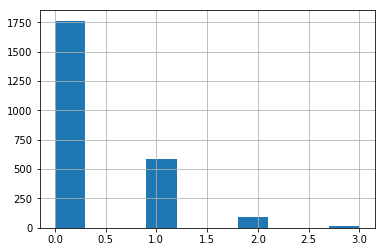

In [39]:
# Check the set of values in instrusions
df.intrus_per_trial.hist()

ToDo: check the set of values across other numerical columns {recalled, recorder, serialpos}

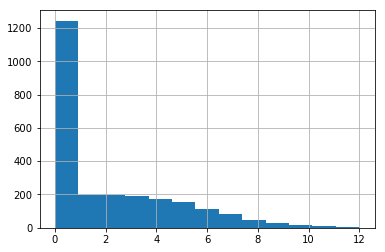

In [49]:
# Check 
df.recorder.hist(bins=13)

In [51]:
# Top tip: you can count the number of elements with `Counter`
Counter(df.recorder)

Counter({0: 1243,
         1: 197,
         2: 196,
         3: 193,
         4: 174,
         5: 152,
         6: 114,
         7: 80,
         8: 47,
         9: 30,
         10: 19,
         11: 11,
         12: 4})

In [ ]:
# ToDo: write some notes explaining the data in `df.recorder`

## Do Analyses!

...

## Overall Analyses

In [53]:
# What is the total number of recalled words
...

Percentage: count / total * 100

In [54]:
# What is the total percentage of recalled words
...

## Group Analyses

In [64]:
# Pandas shortcut: group by exp_group, calculate the mean intrusions & recalled
df.groupby('exp_group')[['intrus_per_trial', 'recalled']].mean()

,intrus_per_trial,recalled
exp_group,,
Teenagers,0.300000,0.495370
Young adults,0.356522,0.494203


In [85]:
# Hint: select data from a dataframe based on value
teen_group = df[df.exp_group == 'Teenagers']

ToDo: compute number of recalled and percentage recalled per group

In [ ]:
...

## Subject Analyses

Select a subject, compute number of recalled and percent recalled.

## NEXT: Compute the performance, split by condition

Calculate the performance per condition {FR vs. FR_MP}

Then calculate the performance per condition, split up by group. 

What is the change in performance between conditions?

Is it different by group?

In [90]:
# Hint: you can do multiple selections: select by group, then select by condition (in a two step process).
#   For example, if you've selected by group to get `teen_group` you can then select by condition
teen_group_fr = teen_group[teen_group.condition == 'FR']